https://towardsdatascience.com/5-steps-to-build-beautiful-stacked-area-charts-with-python-601041964328

Data was not where the article said. I found it here.
https://ourworldindata.org/grapher/electricity-prod-source-stacked

In [8]:
import sys
print("Python version:", sys.version)

Python version: 3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator, MultipleLocator
from matplotlib.dates import YearLocator, DateFormatter

# Read the data
#df = pd.read_csv('electricity-prod-source-stacked.csv', sep=',')
df = pd.read_csv('electricity-prod-source-stacked.csv', sep=',')

# Keep only the data related to the US
df = df[df['Entity'] == 'United States']

# Rename the columns
df.rename(columns={'Other renewables excluding bioenergy - TWh (adapted for visualization of chart electricity-prod-source-stacked)': 'Other renewables',
                   'Electricity from bioenergy - TWh (adapted for visualization of chart electricity-prod-source-stacked)': 'Bioenergy',
                   'Electricity from solar - TWh (adapted for visualization of chart electricity-prod-source-stacked)': 'Solar',
                   'Electricity from wind - TWh (adapted for visualization of chart electricity-prod-source-stacked)': 'Wind',
                   'Electricity from hydro - TWh (adapted for visualization of chart electricity-prod-source-stacked)': 'Hydropower',
                   'Electricity from nuclear - TWh (adapted for visualization of chart electricity-prod-source-stacked)': 'Nuclear',
                   'Electricity from oil - TWh (adapted for visualization of chart electricity-prod-source-stacked)': 'Oil',
                   'Electricity from gas - TWh (adapted for visualization of chart electricity-prod-source-stacked)': 'Gas',
                   'Electricity from coal - TWh (adapted for visualization of chart electricity-prod-source-stacked)': 'Coal'
                  }, inplace=True)

# Convert 'Year' to datetime format
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

# Adequate format : 'Year' as index and only the relevant columns
df = df.set_index('Year')[['Coal', 'Gas', 'Oil', 'Nuclear', 'Hydropower', 'Wind', 'Solar', 'Bioenergy', 'Other renewables']]

In [10]:
df

,Coal,Gas,Oil,Nuclear,Hydropower,Wind,Solar,Bioenergy,Other renewables
Year,,,,,,,,,
1985-01-01,1507.6647,313.92038,107.744380,403.88498,287.18237,0.005820,0.010737,0.00,0.00
1986-01-01,1490.1414,267.21338,146.865450,435.82953,296.97498,0.004231,0.014174,0.00,0.00
1987-01-01,1573.9584,293.14066,127.411370,479.23200,255.41020,0.003577,0.010603,0.00,0.00
1988-01-01,1656.6158,271.82870,160.107060,554.70850,228.38464,0.000880,0.009186,0.00,0.00
1989-01-01,1711.4425,379.17084,176.729600,557.21550,274.72418,2.133377,0.253132,0.00,0.00
1990-01-01,1725.1552,400.82275,135.978710,607.22284,292.28090,2.816768,0.370795,0.00,0.00
1991-01-01,1722.5359,410.27206,128.765140,644.80536,287.32602,2.980759,0.478253,0.00,0.00
1992-01-01,1757.5013,434.48860,107.692650,651.34344,251.42567,2.916690,0.408844,0.00,0.00
1993-01-01,1831.2108,446.15784,121.277610,642.41180,279.25095,3.036189,0.475162,0.00,0.00


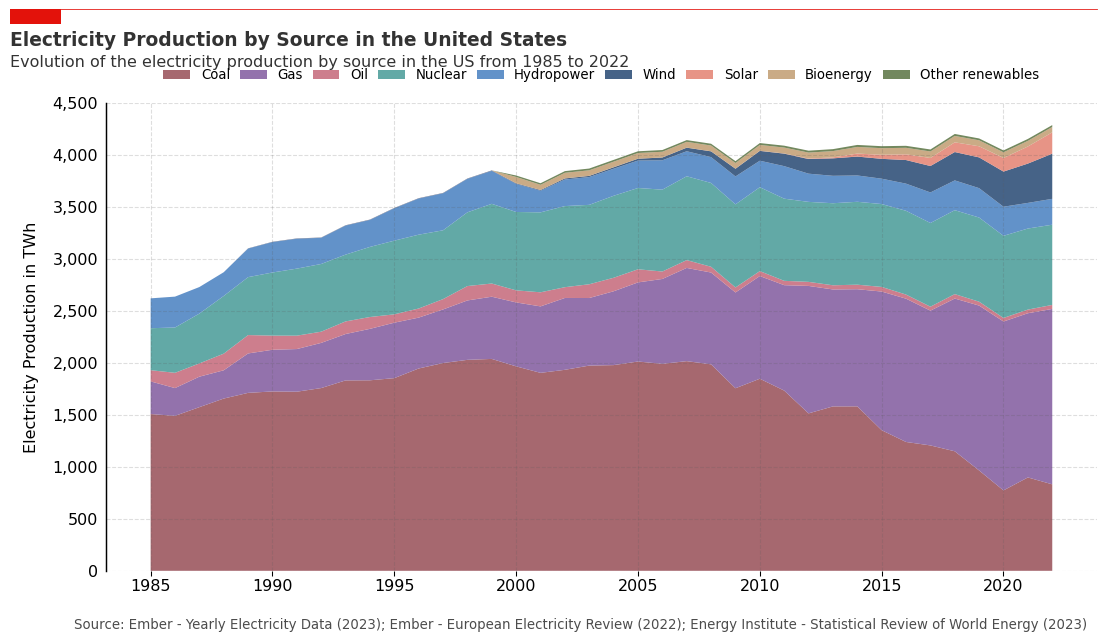

In [21]:


# Create the figure and axes objects, specify the size and the dots per inches 
fig, ax = plt.subplots(figsize=(13.33,7.5), dpi = 96)

# Define colors in a list
colors = ['#9c575f', '#8763a3', '#c87081', '#51a09c', '#5186c4', '#32527a', '#e58879', '#c5a279', '#637b4c']

# Plot the stacked area plot
ax.stackplot(df.index, df.T, labels=df.columns, colors=colors, alpha=0.9)
# Create the grid 
ax.grid(which="major", axis='x', linestyle='--', color='#5b5b5b', alpha=0.2, zorder=1)
ax.grid(which="major", axis='y', linestyle='--', color='#5b5b5b', alpha=0.2, zorder=1)

# Reformat x-axis label and tick labels
ax.set_xlabel('', fontsize=12, labelpad=10) # No need for an axis label
ax.xaxis.set_label_position("bottom")
ax.xaxis.set_major_locator(YearLocator(base=5))
ax.xaxis.set_major_formatter(DateFormatter("%Y"))
ax.xaxis.set_tick_params(pad=2, labelbottom=True, bottom=True, labelsize=12, labelrotation=0)

# Reformat y-axis
ax.set_ylabel('Electricity Production in TWh', fontsize=12, labelpad=10)
ax.yaxis.set_label_position("left")
ax.yaxis.set_major_formatter(lambda s, i : f'{s*1:,.0f}')
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_tick_params(pad=2, labeltop=False, labelbottom=True, bottom=False, labelsize=12)

# Position the legend above the graph and spread horizontally
legend = ax.legend(loc='upper center', bbox_to_anchor=(0.5, +1.10), ncol=len(df.columns), frameon=False, columnspacing=0.75)
legend.get_lines()[::-1]
# Add legend
#plt.legend(loc='best')

# Remove the spines
ax.spines[['top','right','bottom']].set_visible(False)

# Make the left spine thicker
ax.spines['left'].set_linewidth(1.1)

# Add in red line and rectangle on top
ax.plot([0.05, .90], [.98, .98], transform=fig.transFigure, clip_on=False, color='#E3120B', linewidth=.6)
ax.add_patch(plt.Rectangle((0.05,.98), 0.04, -0.02, facecolor='#E3120B', transform=fig.transFigure, clip_on=False, linewidth = 0))

# Add in title and subtitle
ax.text(x=0.05, y=.93, s="Electricity Production by Source in the United States", transform=fig.transFigure, ha='left', fontsize=14, weight='bold', alpha=.8)
ax.text(x=0.05, y=.90, s="Evolution of the electricity production by source in the US from 1985 to 2022", transform=fig.transFigure, ha='left', fontsize=12, alpha=.8)

# Set source text
ax.text(x=0.1, y=0.12, s="Source: Ember - Yearly Electricity Data (2023); Ember - European Electricity Review (2022); Energy Institute - Statistical Review of World Energy (2023)", transform=fig.transFigure, ha='left', fontsize=10, alpha=.7)

# Adjust the margins around the plot area
plt.subplots_adjust(left=None, bottom=0.2, right=None, top=0.85, wspace=None, hspace=None)

# Set a white background
fig.patch.set_facecolor('white')